### 任务：
1. 基于 anomaly_data.csv 数据，可视化数据分布情况、及其对应高斯分布的概率密度函数
2. 建立模型，实现异常数据点预测
3. 可视化异常检测处理结果
4. 修改概率分布阈值 EllipticEnvelope(contamination=0.1) 中的contamination，查看阈值改变对结果的影响

In [1]:
# 控制以允许JupyterNotebook多个输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data_path = './datasets/10/anomaly_data.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope

In [4]:
data = pd.read_csv(data_path)
data.head()

,x1,x2
0,8.046815,9.741152
1,8.408520,8.763270
2,9.195915,10.853181
3,9.914701,11.174260
4,8.576700,9.042849


In [5]:
data = np.array(data)
X = data[:, :2]
X.shape

(307, 2)

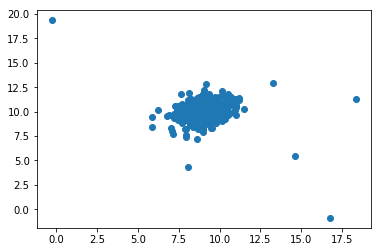

In [6]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [7]:
ad_model = EllipticEnvelope()
ad_model

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [8]:
ad_model.fit(X)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [9]:
y_predict = ad_model.predict(X)
y_predict

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1

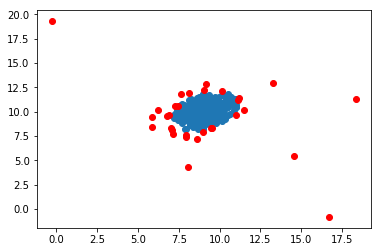

In [10]:
plt.scatter(X[y_predict==1, 0], X[y_predict==1, 1])
plt.scatter(X[y_predict==-1, 0], X[y_predict==-1, 1], color='r')
plt.show()

In [11]:
# 绘制决策边界
def plot_decision_boundary(model, axis, epsilon=500):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], epsilon).reshape(-1, 1),
        np.linspace(axis[2], axis[3], epsilon).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

EllipticEnvelope(assume_centered=False, contamination=0.02, random_state=None,
         store_precision=True, support_fraction=None)

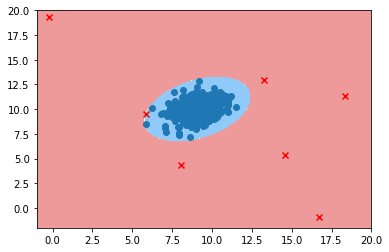

In [12]:
ad_model_2 = EllipticEnvelope(contamination=0.02)
ad_model_2.fit(X)
y_predict_2 = ad_model_2.predict(X)

plot_decision_boundary(model=ad_model_2, axis=[-1, 20, -2, 20], epsilon=1000)
plt.scatter(X[y_predict_2==1, 0], X[y_predict_2==1, 1])
plt.scatter(X[y_predict_2==-1, 0], X[y_predict_2==-1, 1], color='r', marker='x')
plt.show()